## Titanic project
## Our goal is to predict whether a passenger survived during shipwreck based on their age, occupation, rank etc.
### We want to use Decision trees and Random Forest algorithms to make predictions
### Outline to complete this project
(0) Import relevant libraries and import csv data using pandas library \
(1) Understand the shape/features of the data and visualize the trend using matplotlib (plots) \
(2) Data cleaning \
(3) Data exploration \
(4) Feature engineering \
(5) Data Preprocessing \
(6) Building models \
(7) Tunning model \
(8) Results and comparison

The description of the data set columns is here:
https://www.kaggle.com/competitions/titanic/data?select=train.csv


In [1]:
## Import relevant library and import data sets
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

#load input data train.csv and test.csv using pandas data frame
train_pd = pd.read_csv("train.csv")
test_pd = pd.read_csv("test.csv")



In [2]:
## Get general info about the data such as different columns
print(train_pd.shape)
train_pd.head()


(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Variable Notes 
### survival	is Survival	0 = No, 1 = Yes
### pclass: A proxy for socio-economic status (SES)
1st = Upper \
2nd = Middle \
3rd = Lower

### age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

### sibsp: The dataset defines family relations in this way... 
It is number of siblings / spouses aboard the Titanic	\
Sibling = brother, sister, stepbrother, stepsister \
Spouse = husband, wife (mistresses and fiancés were ignored) 

### parch: The dataset defines family relations in this way...
It is number of parents / children aboard the Titanic \
Parent = mother, father \
Child = daughter, son, stepdaughter, stepson \
Some children travelled only with a nanny, therefore parch=0 for them 

### ticket	is Ticket number	
### fare	is Passenger fare	
### cabin	is Cabin number	
### embarked	is Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

In [3]:
#Check for null values
train_pd.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
#Count null values in each column
train_pd.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
#To better understand the central tendency of the numeric data, we can use the .describe() method. 
train_pd.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


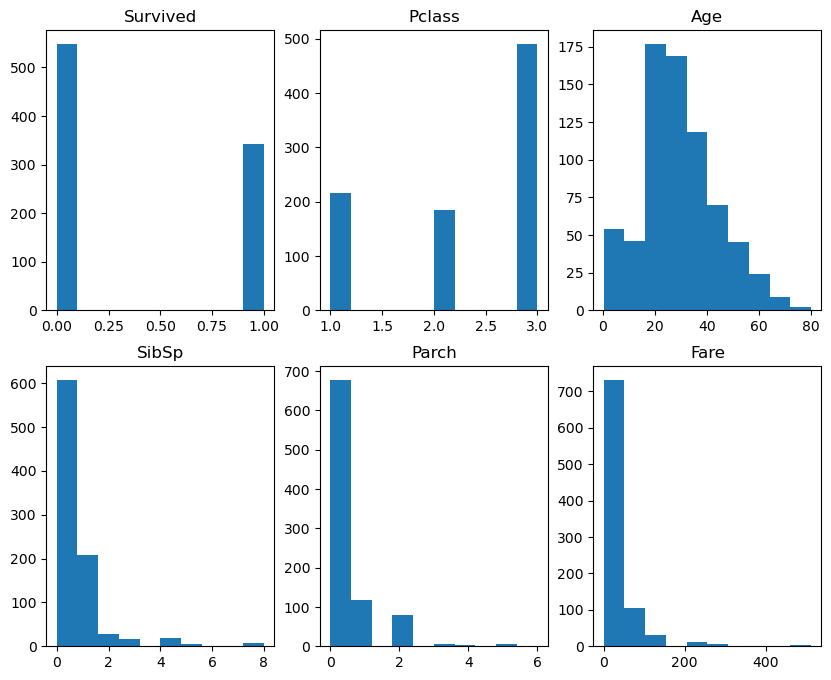

In [62]:
#Let's make 1D histogram of numeric data to see the overall distribution
# We use "hist" function for numeric data
# For categorical data, we should use "barplot" function defined in seaborn library
#print( train_pd.head())
fig, ax = plt.subplots(2,3,figsize=(10,8))
name = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
m=0
for i in range(0,2):
    for j in range(0,3):
        # ax[0].hist(train_pd['Age'])
        ax[i,j].hist(train_pd[name[m]])
        ax[i,j].set_title(name[m])        
        m=m+1
plt.show() 

# (1) The data indicate that roughly 65% passenger survived
# (2) There are three classes of passenger: Number of passenger in class 1 and 2 are roughly same and are
# roughly half the number of passenger in class-3 (lower class)
# (3) The age distribution of passenger is roughly Gaussian centered around 30 years with deviation 10 years
# (4) The number of passengers with siblings onboard is mostly zero
# (5) The number of passengers with parents onboard is mostly zero
# (6) The fare is roughly peaked between 0-50 USD


          Survived    Pclass       Age     SibSp     Parch      Fare
Survived  1.000000 -0.338481 -0.077221 -0.035322  0.081629  0.257307
Pclass   -0.338481  1.000000 -0.369226  0.083081  0.018443 -0.549500
Age      -0.077221 -0.369226  1.000000 -0.308247 -0.189119  0.096067
SibSp    -0.035322  0.083081 -0.308247  1.000000  0.414838  0.159651
Parch     0.081629  0.018443 -0.189119  0.414838  1.000000  0.216225
Fare      0.257307 -0.549500  0.096067  0.159651  0.216225  1.000000


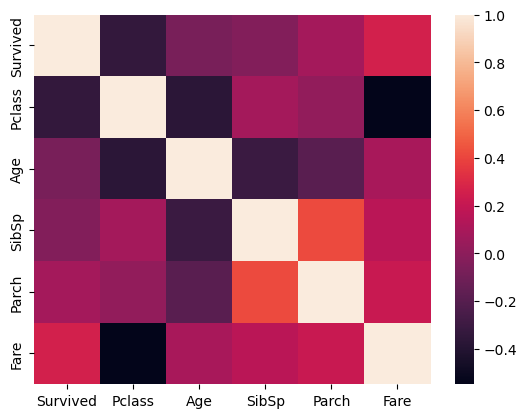

In [63]:
# To study the correlation between the two variables, we can compute
# the pearson coefficient using function "corr()" defined in pandaDataFrame.
# The pearson coefficient between two variable x and y is given as a ratio of sqrt(SD(x)) to sqrt(SD(y) time slope 
#.   of the linear fit to the data formed by x and y
# Pearson coefficient is proportional to the slope and measure the strength of linear correlation
# it varies from -1 to +1.
# We use seaborn library function "heatmap" to visualize 
PearsonDataMatrix = train_pd[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr()
print(PearsonDataMatrix)
sb.heatmap(PearsonDataMatrix )
plt.show() 

male      577
female    314
Name: Sex, dtype: int64 

Index(['male', 'female'], dtype='object')


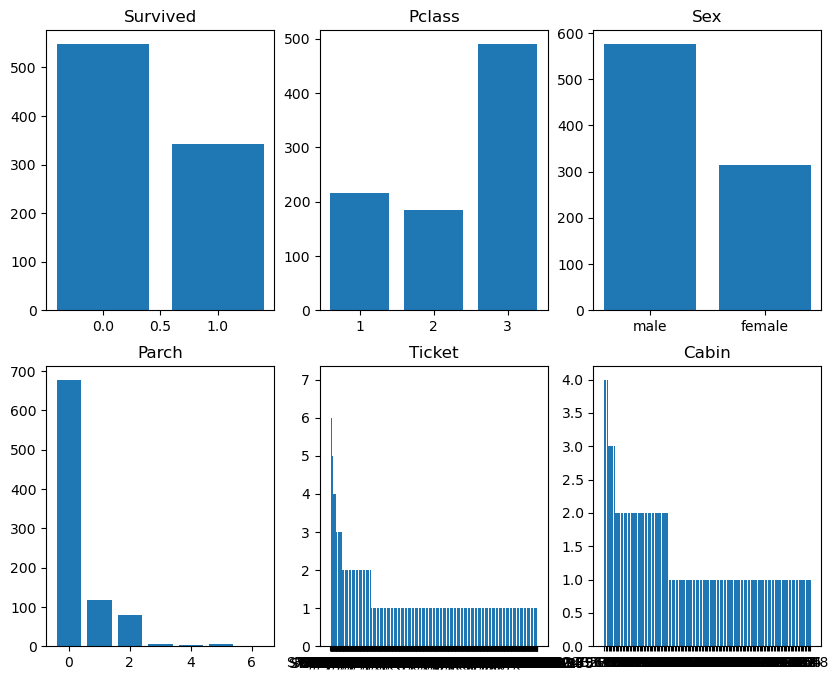

In [46]:
# Now, let's plot categorical data using matplotlib
print( train_pd['Sex'].value_counts() ,"\n")
print(train_pd['Sex'].value_counts().index )

#plt.bar(train_pd['Sex'].value_counts().index, train_pd['Sex'].value_counts())
fig, ax = plt.subplots(2,3,figsize=(10,8))
name = ['Survived', 'Pclass', 'Sex', 'Parch', 'Ticket', 'Cabin']
m=0
for i in range(0,2):
    for j in range(0,3):
        ax[i,j].bar(train_pd[name[m]].value_counts().index, train_pd[name[m]].value_counts())
        ax[i,j].set_title(name[m])        
        m=m+1
plt.show() 

male      577
female    314
Name: Sex, dtype: int64 

Index(['male', 'female'], dtype='object')


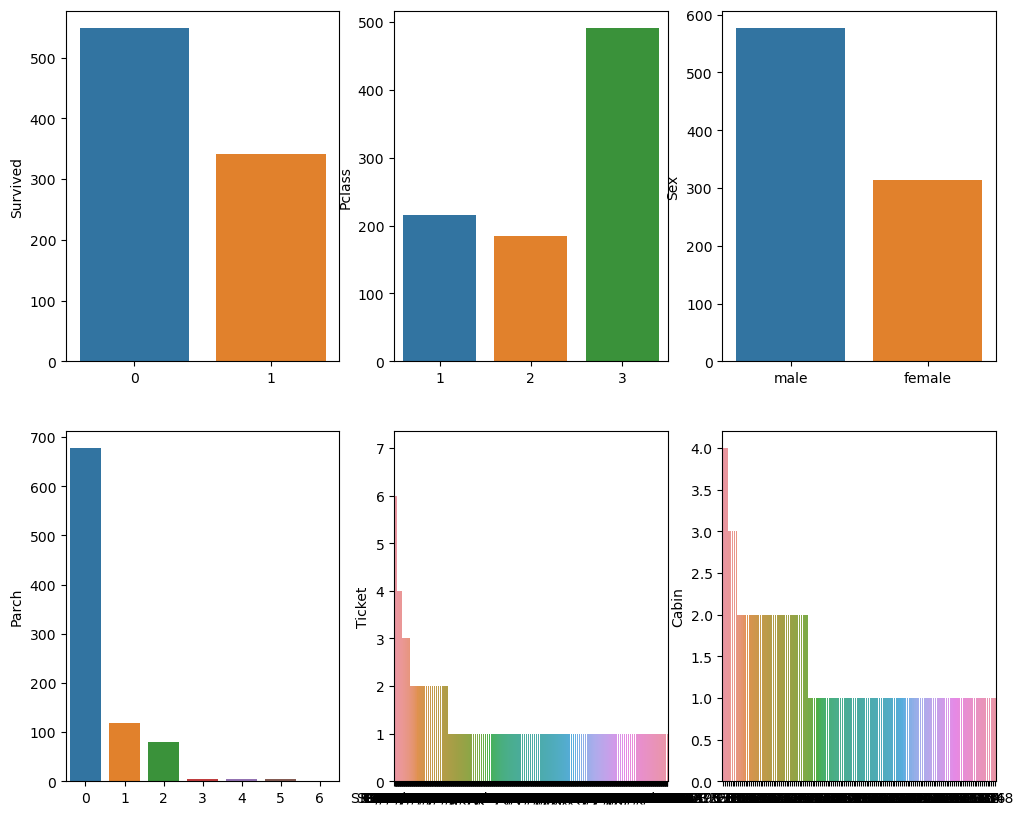

In [64]:
# Now, let's plot categorical data using seaborn library
print( train_pd['Sex'].value_counts() ,"\n")
print(train_pd['Sex'].value_counts().index )

#plt.bar(train_pd['Sex'].value_counts().index, train_pd['Sex'].value_counts())
fig, axs = plt.subplots(2,3,figsize=(12,10))
name = ['Survived', 'Pclass', 'Sex', 'Parch', 'Ticket', 'Cabin']
m=0

for i in range(0,2):
    for j in range(0,3):
        sb.barplot( x=train_pd[name[m]].value_counts().index, y=train_pd[name[m]].value_counts(), ax=axs[i,j])
        ax[i,j].set_title(name[m])        
        m=m+1
plt.show()        